This code is written by Reihane Montazeri...
Well... reihane, you did it! Congrats for your first ever project... this is how you're wrapping 2024. I dont know what are you going to do next year, but i guess we are gonna be fine... im sure you wont stop here and honestly we are all so excited about BI team, about your start in new position as data scientist, and we know about all you went through this year... from experiencing new friendships, work place, colleagues and new teamates... it wasnt easy... it was tough actually... you did everything you could and i want you to know how proud i am! yeah... im proud of me, i did so many things this year, from starting new job until getting through new relationships... from all the offenses you heard till all compliments... now you know how to spend your energy and where to invest it... lets crush next year as well... im gonna wish you luck but we both know we are the ones who make all dreams come true... so work harder next year cause we are not meant to stop, you are only 21 and yet got a long way to go... im here whenever you want, and im sure you do it no matter what... whatever it takes, you are still a warrior... wish you wealth, health, peace and happiness... remember, you are the one in charge of making your own destiny, so be proud of who you are and know that its never late! you are gonna be fine... we all gonna be fine!

In [ ]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/amazonLimitedDataset.csv'
df3 = pd.read_csv(file_path)
df3.head()


,Title,User_id,review/score,review/summary,description,authors,categories
0,the merry adventures of robin hood,AHUNKRQN2M4WI,5.0,Great Seller,Here is a marvelous reprint of the original ed...,['Howard Pyle'],['Juvenile Fiction']
1,building linux virtual private networks,AYYJ05W3PYS01,5.0,The VPN book I wish I'd written,The authors meet the growing demands of de-cen...,"['Oleg Kolesnikov', 'Brian Hatch']",['Computers']
2,endurance shackletons incredible voyage,A1DHO6KJD1PTNB,5.0,the will to survive,This harrowing tale of British explorer Ernest...,['Alfred Lansing'],['History']
3,mary and oneil,A3L0SW6KL3EOSA,5.0,"Great, Great, Great . . .",WINNER OF THE PEN/HEMINGWAY AWARD • “An astoni...,['Justin Cronin'],['Fiction']
4,501 spanish verbs,A358TTRVQMCMIU,4.0,A good book for translating Spanish verbs.,Choose Barron’s for language learning--a trust...,"['Christopher Kendris', 'Theodore Kendris']",['Foreign Language Study']


# **cleaning book data**

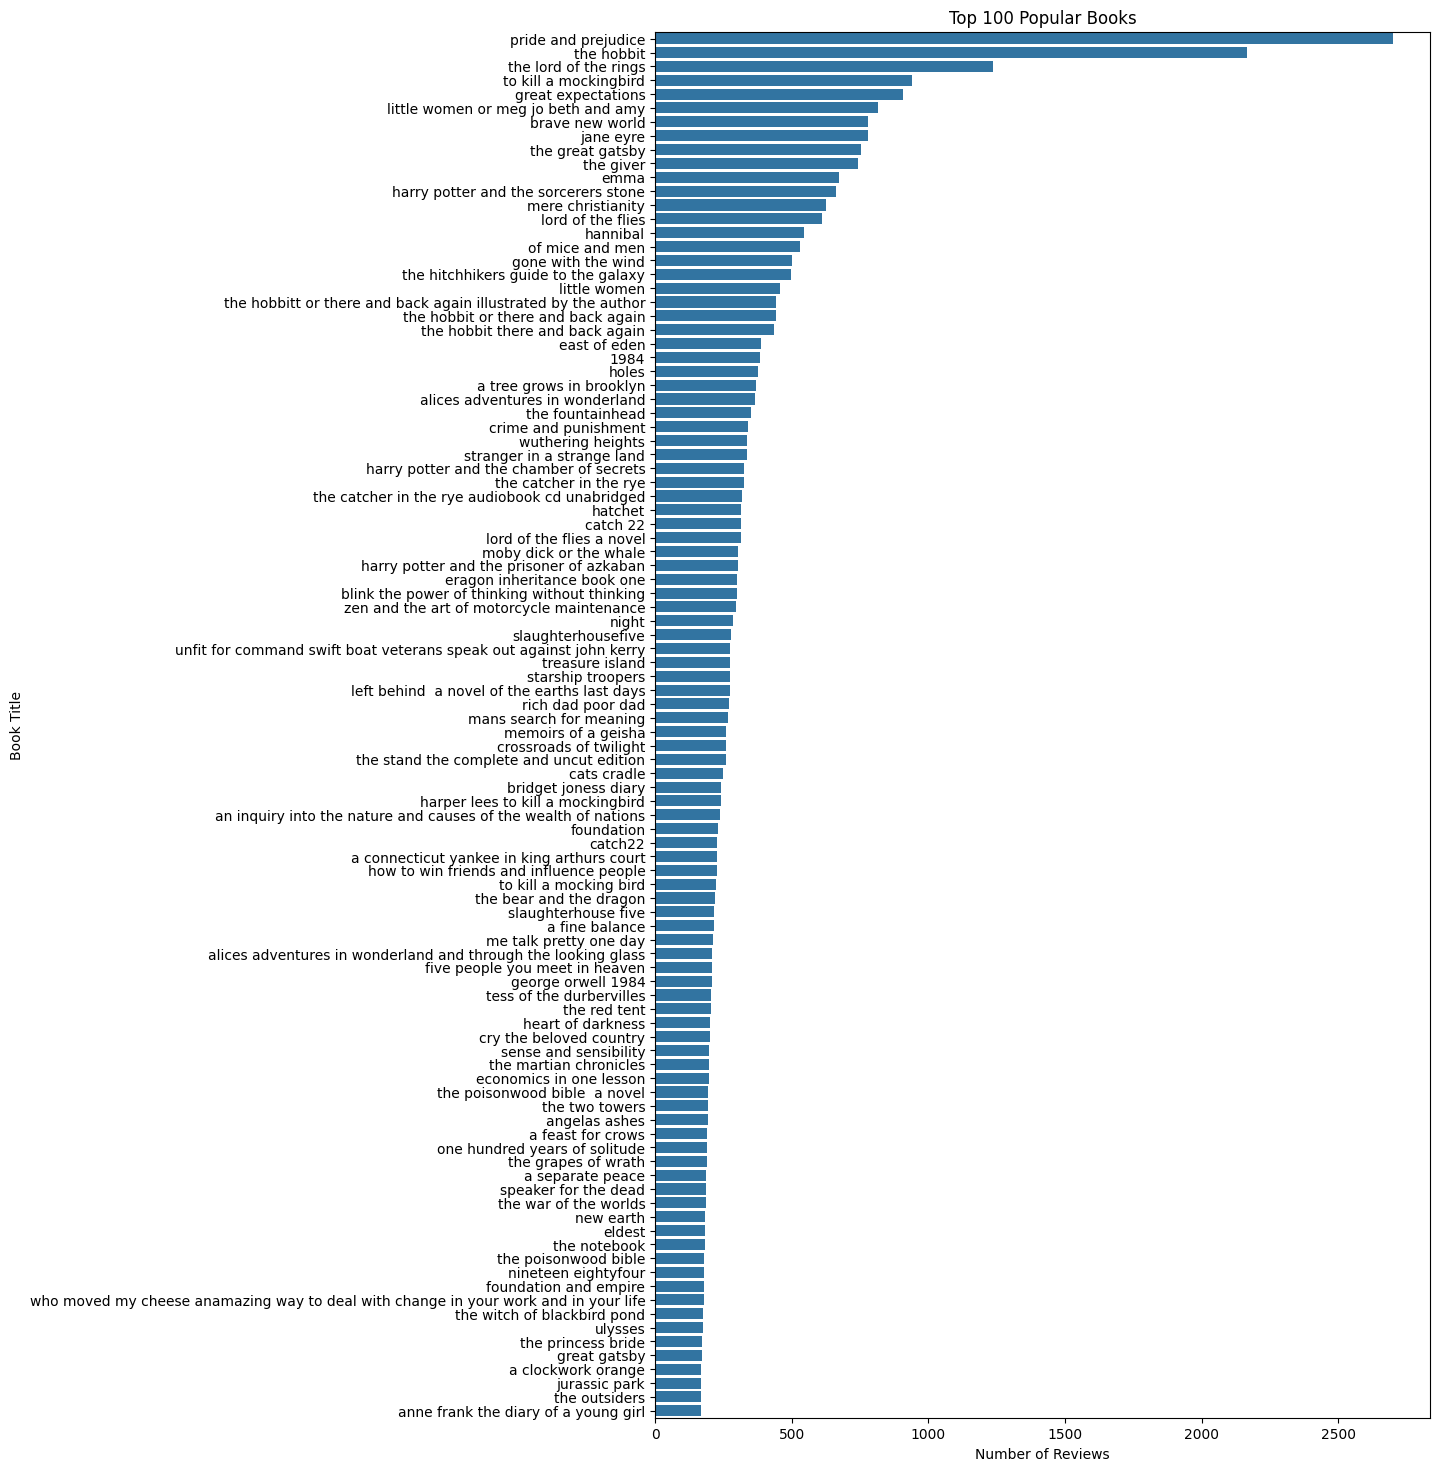

In [ ]:
book_popularity = df3['Title'].value_counts().head(100)  # Show top 100 books

plt.figure(figsize=(10, 18))
sns.barplot(x=book_popularity.values, y=book_popularity.index)
plt.title('Top 100 Popular Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()


In [ ]:
print(book_popularity.head(60))

Title
pride and prejudice                                                   2701
the hobbit                                                            2166
the lord of the rings                                                 1235
to kill a mockingbird                                                  941
great expectations                                                     906
little women or meg jo beth and amy                                    817
brave new world                                                        781
jane eyre                                                              780
the great gatsby                                                       754
the giver                                                              741
emma                                                                   673
harry potter and the sorcerers stone                                   661
mere christianity                                                      624
lord of the flies  

In [ ]:
df3['Title'].nunique()

53947

In [ ]:
df3['Title'] = df3['Title'].str.lower()

In [ ]:
import re

# Define a function to remove text within parentheses and punctuation

def clean_title(text):
    text = re.sub(r'\s*\(.*?\)\s*', '', text)
    text = text.replace('&', 'and')
    text = re.sub(r'[^\w\s]', '', text)
    return text

df3['Title'] = df3['Title'].apply(clean_title)

df3.head()


,Title,User_id,review/score,review/summary,description,authors,categories
0,the merry adventures of robin hood,AHUNKRQN2M4WI,5.0,Great Seller,Here is a marvelous reprint of the original ed...,['Howard Pyle'],['Juvenile Fiction']
1,building linux virtual private networks,AYYJ05W3PYS01,5.0,The VPN book I wish I'd written,The authors meet the growing demands of de-cen...,"['Oleg Kolesnikov', 'Brian Hatch']",['Computers']
2,endurance shackletons incredible voyage,A1DHO6KJD1PTNB,5.0,the will to survive,This harrowing tale of British explorer Ernest...,['Alfred Lansing'],['History']
3,mary and oneil,A3L0SW6KL3EOSA,5.0,"Great, Great, Great . . .",WINNER OF THE PEN/HEMINGWAY AWARD • “An astoni...,['Justin Cronin'],['Fiction']
4,501 spanish verbs,A358TTRVQMCMIU,4.0,A good book for translating Spanish verbs.,Choose Barron’s for language learning--a trust...,"['Christopher Kendris', 'Theodore Kendris']",['Foreign Language Study']


In [ ]:
# Define a function to clean titles related to "The Lord of the Rings"
def clean_lotr_titles(title):
    pattern = r'the lord of the rings.*'

    match = re.match(pattern, title)
    if match:
        return "the lord of the rings"
    return title

df3['Title'] = df3['Title'].apply(clean_lotr_titles)
df3['Title'] = df3['Title'].str.lower()


df3


,Title,User_id,review/score,review/summary,description,authors,categories
0,the merry adventures of robin hood,AHUNKRQN2M4WI,5.0,Great Seller,Here is a marvelous reprint of the original ed...,['Howard Pyle'],['Juvenile Fiction']
1,building linux virtual private networks,AYYJ05W3PYS01,5.0,The VPN book I wish I'd written,The authors meet the growing demands of de-cen...,"['Oleg Kolesnikov', 'Brian Hatch']",['Computers']
2,endurance shackletons incredible voyage,A1DHO6KJD1PTNB,5.0,the will to survive,This harrowing tale of British explorer Ernest...,['Alfred Lansing'],['History']
3,mary and oneil,A3L0SW6KL3EOSA,5.0,"Great, Great, Great . . .",WINNER OF THE PEN/HEMINGWAY AWARD • “An astoni...,['Justin Cronin'],['Fiction']
4,501 spanish verbs,A358TTRVQMCMIU,4.0,A good book for translating Spanish verbs.,Choose Barron’s for language learning--a trust...,"['Christopher Kendris', 'Theodore Kendris']",['Foreign Language Study']
...,...,...,...,...,...,...,...
224375,fuzzy memories,AUKN7CSG70N6R,5.0,Jack does it again.,The Emmy Award-winning creator of Deep Thought...,['Jack Handey'],['Humor']
224376,differential topology,A3D1P9M16T5UXM,5.0,Good book,"""A very valuable book. In little over 200 page...",['Morris W. Hirsch'],['Mathematics']
224377,the calvin and hobbes lazy sunday book,AN190T0W0BTQJ,4.0,Calvin & Hobbes is funny!,A collection of cartoons presents the antics o...,['Bill Watterson'],['COMICS & GRAPHIC NOVELS.']
224378,pride and prejudice,A2R8UBW1SB7DRU,4.0,Classic,"In early nineteenth-century England, a spirite...",['Jane Austen'],['Fiction']


In [ ]:
# Create a dictionary of title replacements
title_replacements = {
    r'(?i)\bhow\s*to\s*kill\s*(a\s*)?mocking\s*bird\b': 'how to kill a mocking bird',
    r'(?i)\bcatch\s*-?\s*22\b': 'catch-22',
    r'(?i)\bharper\s*lees\s*to\s*kill\s*a\s*mockingbird\b': 'how to kill a mocking bird',
    r'(?i)\bto\s*kill\s*a\s*mockingbird\b': 'how to kill a mocking bird',
    r'(?i)\bhow\s*how\s*to\s*kill\s*(a\s*)?mocking\s*bird\b': 'how to kill a mocking bird',
    r'(?i)\bto\s*kill\s*a\s*mocking\s*bird\b': 'how to kill a mocking bird',
    r'(?i)\blittle women or meg jo beth and amy\b': 'little women',
    r'(?i)\bthe hobbitt or there and back again illustrated by the author\b': 'the hobbit there and back again',
    r'(?i)\bthe hobbit or there and back again\b': 'the hobbit there and back again',
    r'(?i)\bthe catcher in the rye audiobook cd unabridged\b': 'the catcher in the rye',
    r'(?i)\blord of the flies a novel\b': 'lord of the flies',
    r'(?i)\bthe poissonwood bible  a novel\b': 'the poissonwood bible',
    r'(?i)\bnineteen eightyfour\b': '1984',
    r'(?i)\bgeorge orwell 1984\b': '1984',
    r'(?i)\bslaughterhousefive\b': 'slaughterhouse five',
    r'(?i)\bslaughterhouse five or the childrens crusade\b': 'slaughterhouse five',
    r'(?i)\bslaughterhouse five or the childrens crusade a dutydance with death\b': 'slaughterhouse five',
    r'(?i)\balices adventures in wonderland and through the looking glass\b': 'alice adventures in wonderland',
    r'(?i)\balices adventures in wonderland\b': 'alice adventures in wonderland',
    r'(?i)\balice in wonderland and through the looking glass\b': 'alice adventures in wonderland',
    r'(?i)\balices adventures in wonderland and through the lookingglass\b': 'alice adventures in wonderland',
    r'(?i)\banimal farm 50th anniversary edition\b': 'animal farm',
    r'(?i)\bhow how to kill a mocking bird\b': 'how to kill a mocking bird',
    r'(?i)\bthe scarlet letter a romance\b': 'the scarlet letter',
    r'(?i)\bthe poisonwood bible a novel\b': 'the poisonwood bible',
    r'(?i)\bthe poisonwood bible a novel\b': 'the poisonwood bible',
    r'(?i)\bthe outsiders\b': 'outsiders',
    r'(?i)\bthe lord of the rings\b': 'lord of the rings',
    r'(?i)\bthe the adventures of huckleberry finn\b': 'the adventures of huckleberry finn'
}


for pattern, replacement in title_replacements.items():
    df3['Title'] = df3['Title'].replace(to_replace=pattern, value=replacement, regex=True)

df3


,Title,User_id,review/score,review/summary,description,authors,categories
0,the merry adventures of robin hood,AHUNKRQN2M4WI,5.0,Great Seller,Here is a marvelous reprint of the original ed...,['Howard Pyle'],['Juvenile Fiction']
1,building linux virtual private networks,AYYJ05W3PYS01,5.0,The VPN book I wish I'd written,The authors meet the growing demands of de-cen...,"['Oleg Kolesnikov', 'Brian Hatch']",['Computers']
2,endurance shackletons incredible voyage,A1DHO6KJD1PTNB,5.0,the will to survive,This harrowing tale of British explorer Ernest...,['Alfred Lansing'],['History']
3,mary and oneil,A3L0SW6KL3EOSA,5.0,"Great, Great, Great . . .",WINNER OF THE PEN/HEMINGWAY AWARD • “An astoni...,['Justin Cronin'],['Fiction']
4,501 spanish verbs,A358TTRVQMCMIU,4.0,A good book for translating Spanish verbs.,Choose Barron’s for language learning--a trust...,"['Christopher Kendris', 'Theodore Kendris']",['Foreign Language Study']
...,...,...,...,...,...,...,...
224375,fuzzy memories,AUKN7CSG70N6R,5.0,Jack does it again.,The Emmy Award-winning creator of Deep Thought...,['Jack Handey'],['Humor']
224376,differential topology,A3D1P9M16T5UXM,5.0,Good book,"""A very valuable book. In little over 200 page...",['Morris W. Hirsch'],['Mathematics']
224377,the calvin and hobbes lazy sunday book,AN190T0W0BTQJ,4.0,Calvin & Hobbes is funny!,A collection of cartoons presents the antics o...,['Bill Watterson'],['COMICS & GRAPHIC NOVELS.']
224378,pride and prejudice,A2R8UBW1SB7DRU,4.0,Classic,"In early nineteenth-century England, a spirite...",['Jane Austen'],['Fiction']


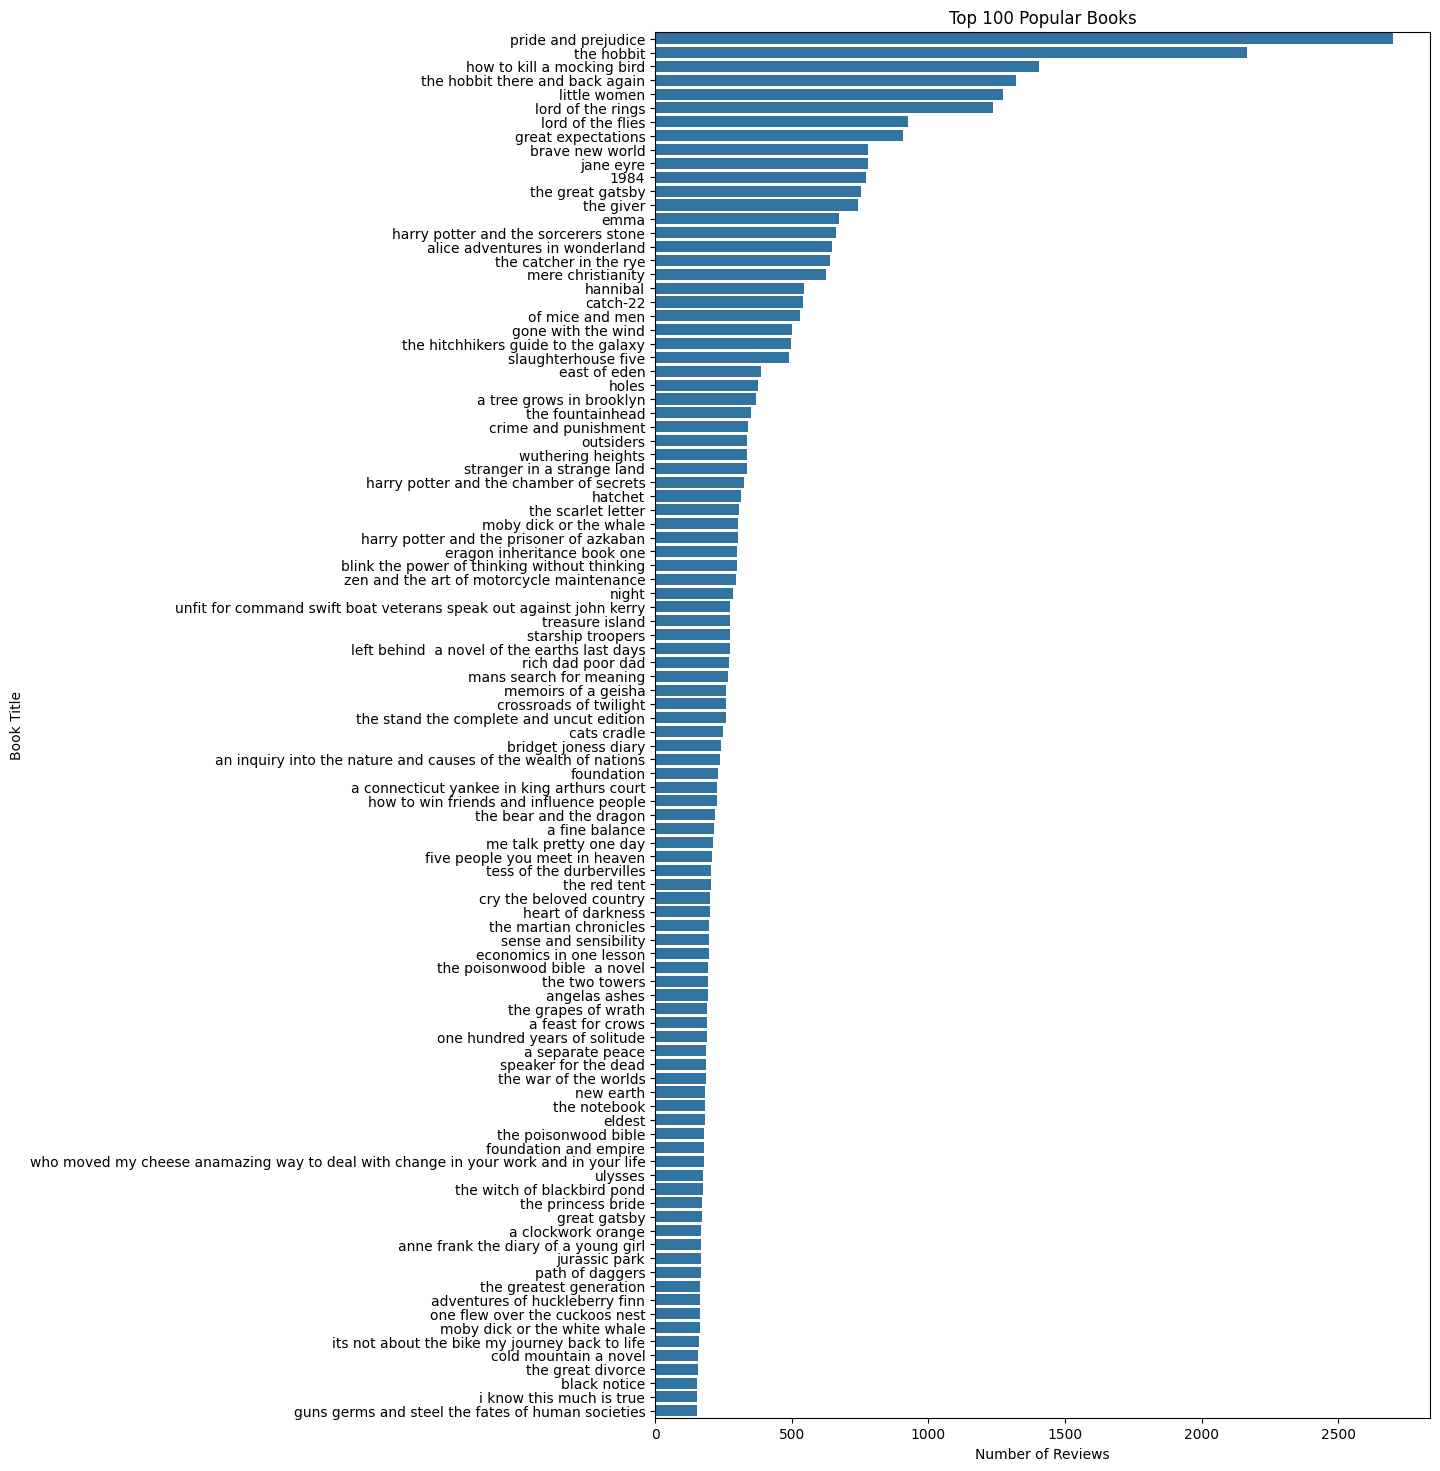

In [ ]:
book_popularity = df3['Title'].value_counts().head(100)  # Show top 100 books

plt.figure(figsize=(10, 18))
sns.barplot(x=book_popularity.values, y=book_popularity.index)
plt.title('Top 100 Popular Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()


In [ ]:
df3['Title'].nunique()

53933

In [ ]:
!pip install rapidfuzz

In [ ]:
from rapidfuzz import process, fuzz


# Define the function to clean titles using regex
def clean_title(text):
    text = text.lower()
    text = re.sub(r'\s*\(.*?\)\s*', '', text)
    text = text.replace('&', 'and')
    text = re.sub(r'[^\w\s]', '', text)
    return text

def get_best_match_rapidfuzz(title, unique_titles, threshold=95):
    result = process.extractOne(title, unique_titles, scorer=fuzz.token_sort_ratio)
    match = result[0]
    score = result[1]
    if score >= threshold:
        return match
    return title



# Split the DataFrame into smaller chunks
num_chunks = 10
chunks = np.array_split(df3, num_chunks)

# Process each chunk
processed_chunks = []
for i, chunk in enumerate(chunks, start=1):
    print(f"Processing chunk {i}/{num_chunks}")

    # Cleaning titles
    chunk['Title'] = chunk['Title'].apply(clean_title)
    print(f"Chunk {i}: Titles cleaned")

    # Getting unique titles and best match
    unique_titles = chunk['Title'].unique()
    chunk['Title'] = chunk['Title'].apply(lambda x: get_best_match_rapidfuzz(x, unique_titles))
    print(f"Chunk {i}: Best matches found")

    processed_chunks.append(chunk)
    print(f"Chunk {i}: Processing completed\n")

# Concatenate the processed chunks back together
df3 = pd.concat(processed_chunks)

print("Shape of DataFrame after processing:", df3.shape)


Processing chunk 1/10
Chunk 1: Titles cleaned
Chunk 1: Best matches found
Chunk 1: Titles capitalized
Chunk 1: Processing completed

Processing chunk 2/10
Chunk 2: Titles cleaned
Chunk 2: Best matches found
Chunk 2: Titles capitalized
Chunk 2: Processing completed

Processing chunk 3/10
Chunk 3: Titles cleaned
Chunk 3: Best matches found
Chunk 3: Titles capitalized
Chunk 3: Processing completed

Processing chunk 4/10
Chunk 4: Titles cleaned
Chunk 4: Best matches found
Chunk 4: Titles capitalized
Chunk 4: Processing completed

Processing chunk 5/10
Chunk 5: Titles cleaned
Chunk 5: Best matches found
Chunk 5: Titles capitalized
Chunk 5: Processing completed

Processing chunk 6/10
Chunk 6: Titles cleaned
Chunk 7: Best matches found
Chunk 7: Titles capitalized
Chunk 7: Processing completed

Processing chunk 8/10
Chunk 8: Titles cleaned
Chunk 8: Best matches found
Chunk 8: Titles capitalized
Chunk 8: Processing completed

Processing chunk 9/10
Chunk 9: Titles cleaned
Chunk 9: Best matches f

In [ ]:
df3['Title'].nunique()

53932

In [ ]:
df3['categories'].unique().sum()

'[\'Juvenile Fiction\'][\'Computers\'][\'History\'][\'Fiction\'][\'Foreign Language Study\'][\'Religion\'][\'Philosophy\'][\'Multilevel marketing\'][\'Social Science\'][\'Body, Mind & Spirit\'][\'Biography & Autobiography\'][\'Political Science\'][\'Literary Criticism\'][\'Adventure stories\'][\'Fantasy fiction\'][\'Poetry\'][\'Bears\'][\'Young Adult Fiction\'][\'FICTION\'][\'Humor\'][\'Art\'][\'Cooking\'][\'Drama\'][\'Business & Economics\'][\'Catholics\'][\'Arctic regions\']["Children\'s clothing"][\'Mythology\'][\'Technology & Engineering\'][\'Music\'][\'Self-Help\'][\'Chicago (Ill.)\'][\'Health & Fitness\'][\'Performing Arts\'][\'Education\'][\'Adultery\'][\'Bibles\'][\'True Crime\'][\'Governesses\'][\'Language Arts & Disciplines\'][\'African Americans\'][\'Architects\'][\'Games\'][\'United States\'][\'House & Home\'][\'Crafts & Hobbies\'][\'Science\'][\'Abandoned children\'][\'Businessmen\'][\'Existential psychotherapy\'][\'British\'][\'Absurd (Philosophy)\'][\'Mathematics\'][\'Ju

In [ ]:
df3['categories'].isna().sum()

0

In [ ]:
bookCategories = df3['categories'].value_counts()
print(bookCategories)

categories
['Fiction']                      81578
['Juvenile Fiction']             20520
['Biography & Autobiography']    10531
['Religion']                      9418
['History']                       8764
                                 ...  
['Tops']                             1
['Forensic scientists']              1
['Horse boarding facilities']        1
['Education, Preschool']             1
['Surgeons']                         1
Name: count, Length: 2525, dtype: int64


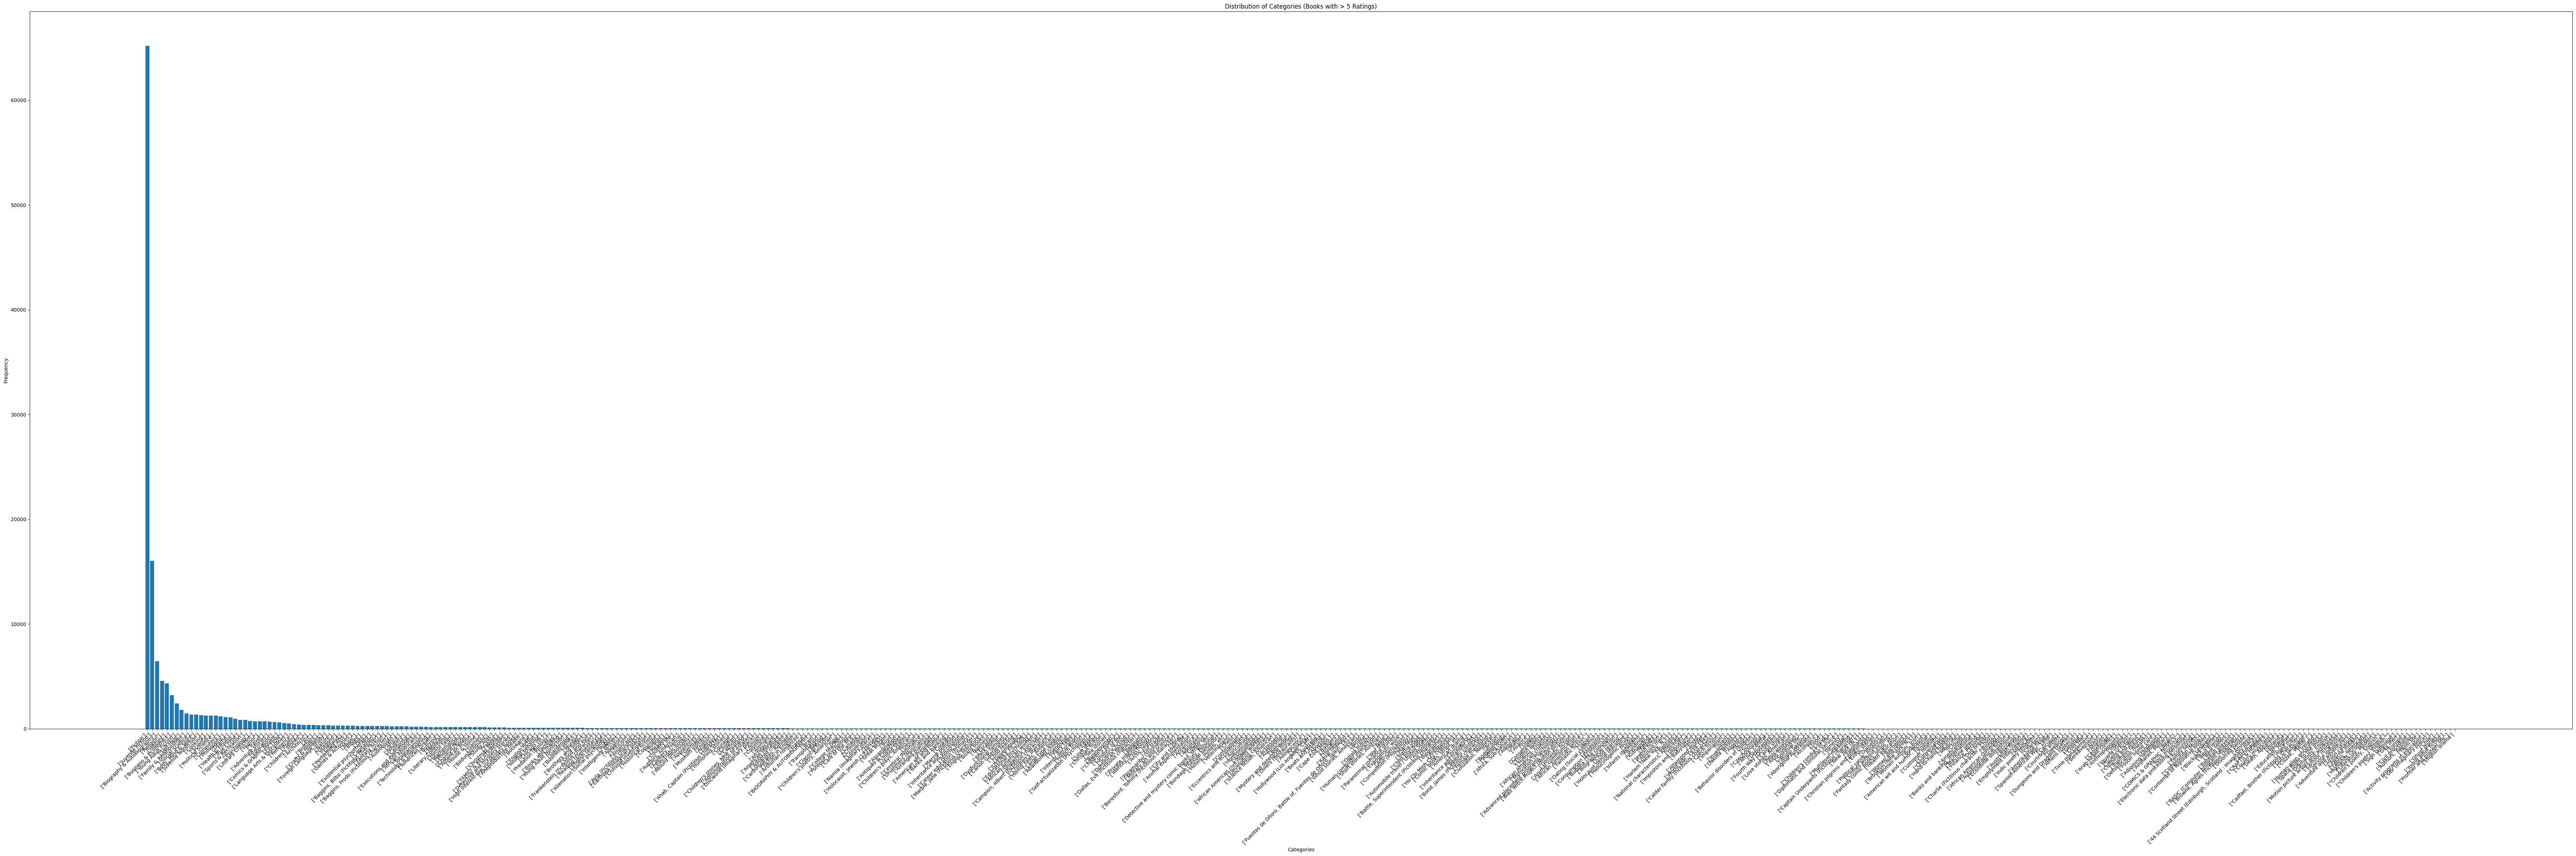

In [ ]:
rating_counts = df3['Title'].value_counts()

# Filter titles with more than 5 ratings
titles_with_more_than_5_ratings = rating_counts[rating_counts > 5].index

# Filter the original DataFrame to include only those titles
filtered_books = df3[df3['Title'].isin(titles_with_more_than_5_ratings)]

# Group by category and count the number of books in each category
category_counts = filtered_books["categories"].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(72, 24))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Distribution of Categories (Books with > 5 Ratings)")
plt.tight_layout()
plt.show()

In [ ]:
# Function to clean column
def clean_column(column):
    # Remove [' at the beginning and '] at the end
    if pd.notna(column):
        column = column.strip("['']").lower()
        # Remove any . at the end of the words
        column = ' '.join([word.rstrip('.') for word in column.split()])
    return column



df3['categories'] = df3['categories'].apply(clean_column)
df3['Title'] = df3['Title'].apply(clean_column)
df3['authors'] = df3['authors'].apply(clean_column)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function to 'category' and 'description' columns
df3['categoriesCleaned'] = df3['categories'].apply(clean_text)
df3['descriptionCleaned'] = df3['description'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **cleaning user data**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    if not isinstance(text, str):
        return ''
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Check for NaN values and handle them
df3['review/summary'] = df3['review/summary'].fillna('')

df3['cleaned_summary'] = df3['review/summary'].apply(preprocess)

df3.head(10)

,Title,User_id,review/score,review/summary,description,authors,categories,categoriesCleaned,descriptionCleaned,cleaned_summary
0,the merry adventures of robin hood,AHUNKRQN2M4WI,5.0,Great Seller,Here is a marvelous reprint of the original ed...,howard pyle,juvenile fiction,juvenile fiction,marvelous reprint original edition finest mode...,great seller
1,building linux virtual private networks,AYYJ05W3PYS01,5.0,The VPN book I wish I'd written,The authors meet the growing demands of de-cen...,"oleg kolesnikov', 'brian hatch",computers,computers,authors meet growing demands decentralized com...,vpn book wish written
2,endurance shackletons incredible voyage,A1DHO6KJD1PTNB,5.0,the will to survive,This harrowing tale of British explorer Ernest...,alfred lansing,history,history,harrowing tale british explorer ernest shackle...,survive
3,mary and oneil,A3L0SW6KL3EOSA,5.0,"Great, Great, Great . . .",WINNER OF THE PEN/HEMINGWAY AWARD • “An astoni...,justin cronin,fiction,fiction,winner penhemingway award astonishingly good f...,great great great
4,501 spanish verbs,A358TTRVQMCMIU,4.0,A good book for translating Spanish verbs.,Choose Barron’s for language learning--a trust...,"christopher kendris', 'theodore kendris",foreign language study,foreign language study,choose barrons language learninga trusted reso...,good book translating spanish verb
5,secrets of an irresistible woman smart rules f...,NaN,5.0,Best Book Yet!,"""Secrets of an Irresistible Woman is required ...",michelle mckinney hammond,religion,religion,secrets irresistible woman required reading wo...,best book yet
6,zen and the art of motorcycle maintenance an i...,A1KXTK2UQGAU3P,4.0,A note about the Kindle edition,THE CLASSIC BOOK THAT HAS INSPIRED MILLIONS A ...,robert m pirsig,philosophy,philosophy,classic book inspired millions penetrating exa...,note kindle edition
7,the 45 second presentation that will change yo...,AMKFK5L3MRTC5,5.0,"A ""must"" reading for Network Marketing",This is the classic MLM how-to: the one that s...,don failla,multilevel marketing,multilevel marketing,classic mlm howto one started still bestseller...,must reading network marketing
8,bush at war,NaN,4.0,"Many good insights, one major flaw","With his unmatched investigative skill, Bob Wo...",bob woodward,social science,social science,unmatched investigative skill bob woodward tel...,many good insight one major flaw
9,catch-22,A3FMLBG1B3JSZG,5.0,Genius,This fiftieth-anniversary edition commemorates...,joseph heller,fiction,fiction,fiftiethanniversary edition commemorates josep...,genius


In [ ]:
nltk.download('vader_lexicon')

# Function to clean text
def clean_text(text):
    if isinstance(text, float):
      text = ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text



df3['cleaned_summary'] = df3['cleaned_summary'].apply(clean_text)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **finding similar books**

In [ ]:
unique_books = df3.drop_duplicates(subset=['Title'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')


In [ ]:
# Fit and transform the 'descriptionCleaned' and 'categoriesCleaned' columns
tfidf_description = tfidf.fit_transform(unique_books['descriptionCleaned'])
tfidf_categories = tfidf.fit_transform(unique_books['categoriesCleaned'])


In [ ]:
from scipy.sparse import hstack

# Combine the two TF-IDF matrices
tfidf_combined = hstack([tfidf_description, tfidf_categories])


In [ ]:
# Dimension reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
reduced_tfidf = svd.fit_transform(tfidf_combined)

In [ ]:
reduced_tfidf

array([[ 0.67459492,  0.03103495,  0.00671249, ...,  0.01016423,
        -0.13044231,  0.01153737],
       [ 0.01635416,  0.09307827,  0.02851652, ...,  0.0248644 ,
         0.05045217,  0.01093483],
       [ 0.04250685,  0.4621656 ,  0.85092084, ...,  0.08793579,
         0.05622892,  0.04199037],
       ...,
       [ 0.00589113,  0.07703163,  0.02158884, ..., -0.03108167,
        -0.07931114, -0.0866512 ],
       [ 0.01873023,  0.02895901,  0.00541608, ..., -0.09817252,
         0.05110271,  0.06783272],
       [ 0.01923018,  0.05338841,  0.0124194 , ...,  0.01003038,
         0.05720809, -0.01099401]])

In [ ]:
!pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=c5f63ec90ce66901fbb289b0e2d0b85a886ea5489bd626fe3f22b7bff0d0f681
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:

from annoy import AnnoyIndex

num_dimensions = reduced_tfidf.shape[1]  # Set number of SVD components
annoy_index = AnnoyIndex(num_dimensions, 'angular')

for i in range(reduced_tfidf.shape[0]):
    annoy_index.add_item(i, reduced_tfidf[i])

annoy_index.build(100)



True

In [ ]:
book_index = unique_books.index.get_loc(14115)  # Get the index of the book in the unique_books DataFrame #previous 12 and the examined user_id : A3J5JAR1MACH0K
similar_books_indices = annoy_index.get_nns_by_item(book_index, 10)

# Map indices back to book information
similar_books = unique_books.iloc[similar_books_indices]


In [ ]:
similar_books

,Title,User_id,review/score,review/summary,description,authors,categories,categoriesCleaned,descriptionCleaned,cleaned_summary
14115,pierre or the ambiguities,A3VNV65XYKKY6A,5.0,Rich Chocolaty Goodness,THERE are some strange summer mornings in the ...,herman melville,fiction,fiction,strange summer mornings country sojourner city...,rich chocolaty goodness
20018,endless night,A2E131AN90KLZJ,5.0,Pure scary,"Some are born to sweet delight, Some are born ...",agatha christie,fiction,fiction,born sweet delight born endless night penniles...,pure scary
220358,the drifting soul,NaN,5.0,A great story..,To the snow-blanketed forest comes the wanderi...,matt spencer,fiction,fiction,snowblanketed forest comes wandering sorcerer ...,great story
15309,the snipers wife,A26Y4C7LO97O2Q,5.0,Superb,The harrowing call comes from the NYPD. Willy'...,archer mayor,fiction,fiction,harrowing call comes nypd willys exwife mary f...,superb
60780,snake agent a detective inspector chen novel,AHQWV4E9KN137,5.0,Unusual urban fantasy,"Introducing Singaporean DI, Wei Chen. “This ex...",liz williams,fiction,fiction,introducing singaporean di wei chen exotic ama...,unusual urban fantasy
5154,the klone and i a hightech love story,A3J5JAR1MACH0K,1.0,Possibly the worst book I've read,Stephanie had a rat for a husband. But after 1...,danielle steel,fiction,fiction,stephanie rat husband 13 years marriage two ki...,possibly worst book read
96315,one summer night,A33XCOYJ0GAIIW,5.0,The best..,College professor Johanna Marshall swore she w...,gerri hill,fiction,fiction,college professor johanna marshall swore would...,best
154730,the wagers of sin,A2EDZH51XHFA9B,2.0,"Silly, but fun.",What happens at the infamous Vega Club . . . S...,caroline linden,fiction,fiction,happens infamous vega club sophie campbell det...,silly fun
104800,the gold shoe,AWGHKDVGDYUB7,5.0,Nice old fashioned story!,"Of all things, a blizzard isn’t what Tasha End...",grace livingston hill,fiction,fiction,things blizzard isnt tasha endicott expected r...,nice old fashioned story
85646,the wanderer or the end of youth,A141XHJX0VEC6V,5.0,Long lost book--found!,When Meaulnes first arrives at the local schoo...,henri alain-fournier,fiction,fiction,meaulnes first arrives local school sologne ev...,long lost book found


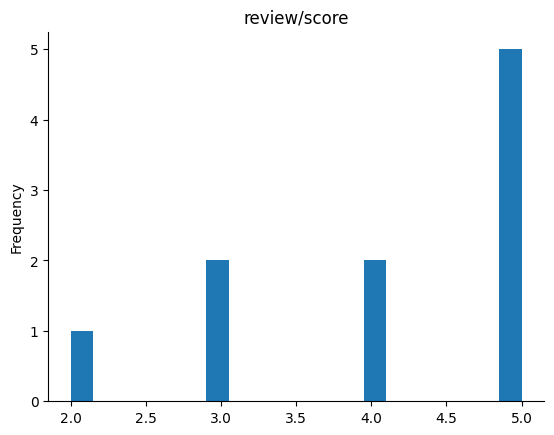

In [ ]:
# @title review/score

from matplotlib import pyplot as plt
similar_books['review/score'].plot(kind='hist', bins=20, title='review/score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def recommend_books_for_user(user_id, df, unique_books, annoy_index, num_recommendations=10):
    """
    Recommends similar books for all books read by a user.

    Parameters:
        user_id (str): The ID of the user.
        df (pd.DataFrame): Original DataFrame with User_id and Title of book.
        unique_books (pd.DataFrame): DataFrame of unique books with their indices in the Annoy index.
        annoy_index (AnnoyIndex): Pre-built Annoy index for similar book retrieval.
        num_recommendations (int): Number of similar books to recommend for each book.

    Returns:
        dict: A dictionary where keys are the books read by the user and values are lists of recommended books.
    """
    # Get all books read by the user
    user_books = df[df['User_id'] == user_id]['Title'].unique()

    # Storing recommendations
    recommendations = {}

    for title in user_books:
        # Check if the book exists in the unique_books DataFrame
        if title in unique_books['Title'].values:
            # Get the index of the book in the unique_books DataFrame
            book_index = unique_books[unique_books['Title'] == title].index[0]
            print('main book index: ',book_index)

            # Get the index of the book in the svd
            book_index_reduced = unique_books.index.get_loc(book_index)
            print('book index in reduced svd: ',book_index_reduced)

            # Retrieve similar books using Annoy
            similar_books_indices = annoy_index.get_nns_by_item(book_index_reduced, num_recommendations)

            # Map indices back to book Titles
            similar_books = unique_books.iloc[similar_books_indices]['Title'].tolist()

            recommendations[title] = similar_books
        else:
            recommendations[title] = []

    return recommendations


In [ ]:
# Example user ID
user_id = "A3VNV65XYKKY6A"

user_recommendations = recommend_books_for_user(user_id, df3, unique_books, annoy_index)

for book, similar_books in user_recommendations.items():
    print(f"Books similar to '{book}': {similar_books}")


main book index:  14115
book index in reduced svd:  8252
main book index:  115670
book index in reduced svd:  36802
main book index:  37
book index in reduced svd:  36
main book index:  7520
book index in reduced svd:  4920
main book index:  5875
book index in reduced svd:  4037
Books similar to 'pierre or the ambiguities': ['pierre or the ambiguities', 'the drifting soul', 'say you love me', 'mistress of marymoor', 'last bride standing', 'the kings grey mare', 'the wagers of sin', 'one summer night', 'kiss of the night', 'london bridges']
Books similar to 'watt': ['watt', 'multiple authorship and the myth of solitary genius', 'the hybrid muse postcolonial poetry in english', 'on deconstruction theory and criticism after structuralism', 'the parsons daughter', 'complete poems of anna akhmatova', 'imagemusictext', 'the cambridge companion to t s eliot', 'conversations with joyce carol oates', 'myth truth and literature towards a true postmodernism']
Books similar to 'pride and prejudice

# **finding similar users**

In [ ]:
df2 = df3.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df3['cleaned_summary'])



print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print('df3:',df3.head())
print('\n tfidf: ',tfidf_df.head())

TF-IDF Matrix Shape: (224380, 1000)
df3:                                      Title         User_id  review/score  \
0       the merry adventures of robin hood   AHUNKRQN2M4WI           5.0   
1  building linux virtual private networks   AYYJ05W3PYS01           5.0   
2  endurance shackletons incredible voyage  A1DHO6KJD1PTNB           5.0   
3                           mary and oneil  A3L0SW6KL3EOSA           5.0   
4                        501 spanish verbs  A358TTRVQMCMIU           4.0   

                               review/summary  \
0                                Great Seller   
1             The VPN book I wish I'd written   
2                         the will to survive   
3                   Great, Great, Great . . .   
4  A good book for translating Spanish verbs.   

                                         description  \
0  Here is a marvelous reprint of the original ed...   
1  The authors meet the growing demands of de-cen...   
2  This harrowing tale of British explo

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD to reduce the dimensionality of the TF-IDF matrix
svd2 = TruncatedSVD(n_components=100)
svd_matrix = svd2.fit_transform(tfidf_matrix)

print("Reduced SVD Matrix Shape:", svd_matrix.shape)


Reduced SVD Matrix Shape: (224380, 100)


In [ ]:
from scipy.sparse import csr_matrix

tfidf_matrix_sparse = csr_matrix(tfidf_matrix)

# Apply SVD on the sparse matrix
svd_matrix_sparse = svd2.fit_transform(tfidf_matrix_sparse)


In [ ]:
# Filter users with at least 5 ratings
active_users = df3['User_id'].value_counts()
active_users = active_users[active_users >= 3].index
df3 = df3[df3['User_id'].isin(active_users)]

# Filter books with at least 5 ratings
popular_books = df3['Title'].value_counts()
popular_books = popular_books[popular_books >= 3].index
df3 = df3[df3['Title'].isin(popular_books)]

print("Filtered dataset shape:", df3.shape)


Filtered dataset shape: (25665, 10)


In [ ]:

# Create a user-item matrix (pivot table) from df
user_item_matrix = df3.pivot_table(index='User_id', columns='Title', values='review/score')

# Fill NaN values with 0 before converting to SparseArray
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix_sparse = user_item_matrix.astype(pd.SparseDtype("float64", 0))

user_item_matrix_sparse.head()

Title           1000 places to see before you die a travelers life list  \
User_id                                                                   
A100NGGXRQF0AQ                                                  0         
A1023VCADMO82                                                   0         
A102KJ9K5Q20PA                                                  0         
A103O59QB4838Z                                                  0         
A103W7ZPKGOCC9                                                  0         

Title           1001 books you must read before you die  \
User_id                                                   
A100NGGXRQF0AQ                                        0   
A1023VCADMO82                                         0   
A102KJ9K5Q20PA                                        0   
A103O59QB4838Z                                        0   
A103W7ZPKGOCC9                                        0   

Title           109 east palace robert oppenheimer and the s

In [ ]:
user_item_matrix

Title,1000 places to see before you die a travelers life list,1001 books you must read before you die,109 east palace robert oppenheimer and the secret city of los alamos,11 days in december christmas at the bulge 1944,1453 the holy war for constantinople and the clash of islam and the west,1491 new revelations of the americas before columbus,1632,1876,1984,1st to die a novel,...,you remind me of me,you shall know our velocity,your god is too small,yours until dawn,zen and the art of motorcycle maintenance,zen and the art of motorcycle maintenance an inquiry into values,zen flesh zen bones a collection of zen and prezen writings,zen in the art of archery,zen mind beginners mind,zorro a novel
User_id,,,,,,,,,,,,,,,,,,,,,
A100NGGXRQF0AQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1023VCADMO82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102KJ9K5Q20PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103O59QB4838Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103W7ZPKGOCC9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZWC9XAY34IPW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWG3PF80735Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWOQXRCS1WA6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Using KNN to find similar users
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # Cosine similarity
knn.fit(user_item_matrix)

# Example: Get the top 5 most similar users to user 0 (first user)
distances, indices = knn.kneighbors(user_item_matrix.iloc[0].values.reshape(1, -1))


print("Top 5 most similar users to User 0:")
for i, idx in enumerate(indices[0][1:]):  # Skip the first user itself
    print(f"User {i+1}: User {user_item_matrix.index[idx]} (Distance: {distances[0][i+1]:.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Top 5 most similar users to User 0:
User 1: User AMQS95OACZAQX (Distance: 0.4759)
User 2: User A2EYCL2ZT0PSTX (Distance: 0.5492)
User 3: User A2NC18AD9TSCT4 (Distance: 0.6096)
User 4: User A3K6FI57OILJIL (Distance: 1.0000)
User 5: User A3K60CKHSOPOX5 (Distance: 1.0000)


In [ ]:
#recommendation 1

# Get the user IDs of the similar users
similar_user_ids = user_item_matrix.index[indices[0][1:]]

# Filter the original df to include only the similar users
similar_users_ratings = df3[df3['User_id'].isin(similar_user_ids)]

print(similar_users_ratings.head())


                                                   Title         User_id  \
7456   the innovators dilemma the revolutionary natio...  A2NC18AD9TSCT4   
12316                            the bear and the dragon  A2EYCL2ZT0PSTX   
31492                       the winter of our discontent  A2NC18AD9TSCT4   
55044  the innovators dilemma the revolutionary natio...   AMQS95OACZAQX   
57290            how to win friends and influence people   AMQS95OACZAQX   

       review/score                               review/summary  \
7456            4.0                              Driven by disks   
12316           4.0                   A Solid Effort from Clancy   
31492           5.0  "A crime is something someone else commits"   
55044           5.0                               Important Read   
57290           5.0                             Timeless Classic   

                                             description  \
7456   In this revolutionary bestseller, innovation e...   
12316  Don't M

In [ ]:
# Get books already rated by the target user
target_user_id = user_item_matrix.index[0]
target_user_books = df3[df3['User_id'] == target_user_id]['Title'].unique()

# Filter books rated by similar users but not by the target user
recommended_books = similar_users_ratings[~similar_users_ratings['Title'].isin(target_user_books)]

# Sort by average rating (or use a more advanced scoring method)
top_recommended_books = (
    recommended_books.groupby('Title')['review/score']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Top 10 recommendations
)

print("Top recommended books for User 0:")
print(top_recommended_books)


Top recommended books for User 0:
Title
amber spyglass                                            5.0
collapse how societies choose to fail or succeed          5.0
how to win friends and influence people                   5.0
more than courage                                         5.0
pale horse coming                                         5.0
the giver                                                 5.0
the winter of our discontent                              5.0
accordion crimes                                          4.0
jack straight from the gut                                4.0
liars poker rising through the wreckage on wall street    4.0
Name: review/score, dtype: float64


In [ ]:
similar_users_ratings.head()

,Title,User_id,review/score,review/summary,description,authors,categories,categoriesCleaned,descriptionCleaned,cleaned_summary
7456,the innovators dilemma the revolutionary natio...,A2NC18AD9TSCT4,4.0,Driven by disks,"In this revolutionary bestseller, innovation e...",clayton m christensen,business & economics,business economics,revolutionary bestseller innovation expert cla...,driven disk
12316,the bear and the dragon,A2EYCL2ZT0PSTX,4.0,A Solid Effort from Clancy,Don't Miss the Original Series Tom Clancy's Ja...,tom clancy,fiction,fiction,dont miss original series tom clancys jack rya...,solid effort clancy
31492,the winter of our discontent,A2NC18AD9TSCT4,5.0,"""A crime is something someone else commits""",The final novel of one of America’s most belov...,john steinbeck,fiction,fiction,final novel one americas beloved writersa tale...,crime something someone else commits
55044,the innovators dilemma the revolutionary natio...,AMQS95OACZAQX,5.0,Important Read,"In this revolutionary bestseller, innovation e...",clayton m christensen,business & economics,business economics,revolutionary bestseller innovation expert cla...,important read
57290,how to win friends and influence people,AMQS95OACZAQX,5.0,Timeless Classic,"Do you feel stuck in life, not knowing how to ...",dale carnegie,self-help,selfhelp,feel stuck life knowing make successful wish b...,timeless classic


In [ ]:
user_item_matrix.columns

Index(['1000 places to see before you die a travelers life list',
       '1001 books you must read before you die',
       '109 east palace robert oppenheimer and the secret city of los alamos',
       '11 days in december christmas at the bulge 1944',
       '1453 the holy war for constantinople and the clash of islam and the west',
       '1491 new revelations of the americas before columbus', '1632', '1876',
       '1984', '1st to die a novel',
       ...
       'you remind me of me', 'you shall know our velocity',
       'your god is too small', 'yours until dawn',
       'zen and the art of motorcycle maintenance',
       'zen and the art of motorcycle maintenance an inquiry into values',
       'zen flesh zen bones a collection of zen and prezen writings',
       'zen in the art of archery', 'zen mind beginners mind',
       'zorro a novel'],
      dtype='object', name='Title', length=2635)

In [ ]:
similar_users_ratings.head()

,Title,User_id,review/score,review/summary,description,authors,categories,categoriesCleaned,descriptionCleaned,cleaned_summary
7456,the innovators dilemma the revolutionary natio...,A2NC18AD9TSCT4,4.0,Driven by disks,"In this revolutionary bestseller, innovation e...",clayton m christensen,business & economics,business economics,revolutionary bestseller innovation expert cla...,driven disk
12316,the bear and the dragon,A2EYCL2ZT0PSTX,4.0,A Solid Effort from Clancy,Don't Miss the Original Series Tom Clancy's Ja...,tom clancy,fiction,fiction,dont miss original series tom clancys jack rya...,solid effort clancy
31492,the winter of our discontent,A2NC18AD9TSCT4,5.0,"""A crime is something someone else commits""",The final novel of one of America’s most belov...,john steinbeck,fiction,fiction,final novel one americas beloved writersa tale...,crime something someone else commits
55044,the innovators dilemma the revolutionary natio...,AMQS95OACZAQX,5.0,Important Read,"In this revolutionary bestseller, innovation e...",clayton m christensen,business & economics,business economics,revolutionary bestseller innovation expert cla...,important read
57290,how to win friends and influence people,AMQS95OACZAQX,5.0,Timeless Classic,"Do you feel stuck in life, not knowing how to ...",dale carnegie,self-help,selfhelp,feel stuck life knowing make successful wish b...,timeless classic


In [ ]:
# Add distances to the similar users' ratings
similar_users_ratings = similar_users_ratings.merge(
    pd.DataFrame({'User_id': similar_user_ids, 'Distance': distances[0][1:]}),
    on='User_id'
)

# Compute a weighted score
similar_users_ratings['Weighted_Score'] = (
    similar_users_ratings['review/score'] / similar_users_ratings['Distance']
)

# Aggregate scores by book
weighted_recommendations = (
    similar_users_ratings.groupby('Title')['Weighted_Score']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top weighted recommended books for User 0:")
print(weighted_recommendations)


Top weighted recommended books for User 0:
Title
the innovators dilemma the revolutionary national bestseller that changed the way we do business    26.173324
how to win friends and influence people                                                             21.014691
collapse how societies choose to fail or succeed                                                    10.507345
the giver                                                                                           10.000000
more than courage                                                                                    9.104729
pale horse coming                                                                                    9.104729
rhinoceros success                                                                                   8.405876
the winter of our discontent                                                                         8.201562
jack straight from the gut                                             

In [ ]:
# Define the ground truth: books rated highly by the target user
target_user_ratings = df3[df3['User_id'] == target_user_id]
ground_truth = target_user_ratings[target_user_ratings['review/score'] >= 4]['Title'].tolist()

print("Ground Truth (Highly Rated Books by User 0):")
print(ground_truth)


Ground Truth (Highly Rated Books by User 0):
['the innovators dilemma the revolutionary national bestseller that changed the way we do business']


In [ ]:
# Get the top K recommended books
recommended_books = weighted_recommendations.index.tolist()  # Titles of top recommended books
K = len(recommended_books)

# Calculate Precision@K
relevant_items = set(ground_truth).intersection(set(recommended_books))
precision_at_k = len(relevant_items) / K

# Calculate Recall@K
recall_at_k = len(relevant_items) / len(ground_truth) if len(ground_truth) > 0 else 0

print(f"Precision@{K}: {precision_at_k:.2f}")
print(f"Recall@{K}: {recall_at_k:.2f}")


Precision@10: 0.10
Recall@10: 1.00


In [ ]:
def evaluate_recommendation_system(user_id, user_item_matrix, ratings_df, knn_model, top_n=10):
    # Step 1: Generate Recommendations
    distances, indices = knn_model.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1))
    similar_user_ids = user_item_matrix.index[indices[0][1:]]

    similar_users_ratings = ratings_df[ratings_df['User_id'].isin(similar_user_ids)]
    target_user_books = ratings_df[ratings_df['User_id'] == user_id]['Title'].unique()
    recommended_books = similar_users_ratings[~similar_users_ratings['Title'].isin(target_user_books)]

    similar_users_ratings = similar_users_ratings.merge(
        pd.DataFrame({'User_id': similar_user_ids, 'Distance': distances[0][1:]}),
        on='User_id'
    )
    similar_users_ratings['Weighted_Score'] = (
        similar_users_ratings['review/score'] / similar_users_ratings['Distance']
    )
    weighted_recommendations = (
        similar_users_ratings.groupby('Title')['Weighted_Score']
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
    )
    recommended_books = weighted_recommendations.index.tolist()

    # Step 2: Get Ground Truth
    target_user_ratings = ratings_df[ratings_df['User_id'] == user_id]
    ground_truth = target_user_ratings[target_user_ratings['review/score'] >= 4]['Title'].tolist()

    # Step 3: Compute Precision and Recall
    relevant_items = set(ground_truth).intersection(set(recommended_books))
    precision = len(relevant_items) / top_n
    recall = len(relevant_items) / len(ground_truth) if len(ground_truth) > 0 else 0

    return precision, recall

# Evaluate for multiple users
user_ids = user_item_matrix.index[:10]  # Example: First 10 users
precision_scores = []
recall_scores = []

for user_id in user_ids:
    precision, recall = evaluate_recommendation_system(user_id, user_item_matrix, df3, knn, top_n=10)
    precision_scores.append(precision)
    recall_scores.append(recall)

print(f"Average Precision@10: {sum(precision_scores) / len(precision_scores):.2f}")
print(f"Average Recall@10: {sum(recall_scores) / len(recall_scores):.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Average Precision@10: 0.15
Average Recall@10: 0.73


In [ ]:
target_user_id = "A2NC18AD9TSCT4"
all_users_ids = []

# Check if the target user exists in the user-item matrix
if target_user_id in user_item_matrix.index:
    # Get the row corresponding to the target user
    target_user_vector = user_item_matrix.loc[target_user_id].values.reshape(1, -1)

    # Find the top 5 most similar users to the target user
    distances, indices = knn.kneighbors(target_user_vector)


    # Print the indices and distances of the most similar users
    print(f"Top 5 most similar users to User {target_user_id}:")
    for i, idx in enumerate(indices[0][1:]):
        similar_user_id = user_item_matrix.index[idx]
        print(f"User {i+1}: User {similar_user_id} (Distance: {distances[0][i+1]:.4f})")

    # Get the user IDs of the similar users
    similar_user_ids = user_item_matrix.index[indices[0][1:]]
    all_users_ids = user_item_matrix.index[indices[0]]


    # Filter the original ratings dataframe to include only the similar users
    similar_users_ratings = df3[df3['User_id'].isin(similar_user_ids)]

    print(similar_users_ratings.head())


else:
    print(f"User ID {target_user_id} not found in the user-item matrix.")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Top 5 most similar users to User A2NC18AD9TSCT4:
User 1: User AGFNLMUZ09UF1 (Distance: 0.5940)
User 2: User A100NGGXRQF0AQ (Distance: 0.6096)
User 3: User A1WEFI02Q80FG4 (Distance: 0.6509)
User 4: User A359IT81FBX64Y (Distance: 0.6701)
User 5: User A191Q7CRVPY5WO (Distance: 0.6952)
                                                    Title         User_id  \
27054                        the winter of our discontent   AGFNLMUZ09UF1   
40971   liars poker rising through the wreckage on wal...  A1WEFI02Q80FG4   
54281     the art of burning bridges a life of john ohara  A191Q7CRVPY5WO   
96314                        the winter of our discontent  A359IT81FBX64Y   
103414                                slaughterhouse five  A1WEFI02Q80FG4   

        review/score                                     review/summary  \
27054            3.0                   some of the writing is brilliant   
40971            4.0  Terrific portrait of 1980s Wall Street before ...   
54281            4.0         

In [ ]:
recommendations = {}

# Iterate over all similar user IDs
for user_id in all_users_ids:
    print(user_id)

    # Get recommendations for the current user
    user_recommendations = recommend_books_for_user(user_id, df3, unique_books, annoy_index)

    # Merge recommendations into the main dictionary
    for book, similar_books in user_recommendations.items():
        if book not in recommendations:
            recommendations[book] = set()  # Use a set to avoid duplicate entries
        recommendations[book].update(similar_books)


recommendations_with_details = []

for book, similar_books in recommendations.items():
    for similar_book in similar_books:
        # Retrieve details for each similar book
        book_details = df2[df2['Title'] == similar_book].iloc[0]
        recommendations_with_details.append({
            "Book": book,
            "Similar Book": similar_book,
            "Categories": book_details.get('categories', 'N/A'),
            "Review Score": book_details.get('review/score', 'N/A'),
            "Description": book_details.get('description', 'N/A'),
            "Review Summary": book_details.get('review/summary', 'N/A'),
            "Author": book_details.get('author', 'N/A')
        })

recommendations_df = pd.DataFrame(recommendations_with_details)

print(recommendations_df)


A2NC18AD9TSCT4
main book index:  7456
book index in reduced svd:  4887
main book index:  2659
book index in reduced svd:  2064
main book index:  1585
book index in reduced svd:  1316
main book index:  33983
book index in reduced svd:  16152
main book index:  8639
book index in reduced svd:  5505
main book index:  4174
book index in reduced svd:  3044
AGFNLMUZ09UF1
main book index:  2659
book index in reduced svd:  2064
main book index:  8676
book index in reduced svd:  5525
A100NGGXRQF0AQ
main book index:  7456
book index in reduced svd:  4887
A1WEFI02Q80FG4
main book index:  1585
book index in reduced svd:  1316
main book index:  1420
book index in reduced svd:  1199
A359IT81FBX64Y
main book index:  2659
book index in reduced svd:  2064
main book index:  6107
book index in reduced svd:  4165
main book index:  8068
book index in reduced svd:  5208
main book index:  5407
book index in reduced svd:  3782
A191Q7CRVPY5WO
main book index:  54281
book index in reduced svd:  22536
main book i

In [ ]:
recommendations_df.head(50)

,Book,Similar Book,Categories,Review Score,Description,Review Summary,Author
0,the innovators dilemma the revolutionary natio...,the leadership engine how winning companies bu...,business & economics,5.0,In this Wall Street Journal and BusinessWeek b...,"They Can, They Do, They Teach!",N/A
1,the innovators dilemma the revolutionary natio...,the openbook experience lessons from over 100 ...,business & economics,5.0,Over the last decade companies have struggled ...,The next step for Open-Book Management,N/A
2,the innovators dilemma the revolutionary natio...,creative constructions,business & economics,5.0,This myth-busting book shows large companies c...,Adult use for crafts,N/A
3,the innovators dilemma the revolutionary natio...,the auction app how companies tap the power of...,business & economics,5.0,How companies such as L. L. Bean and Sun Micro...,Up to the next level,N/A
4,the innovators dilemma the revolutionary natio...,the good corporate citizen a practical guide,business & economics,5.0,Corporate citizenship refers to the way a comp...,Multiple uses,N/A
5,the innovators dilemma the revolutionary natio...,sales management,business & economics,5.0,Boost sales results by zeroing in on the metri...,Highly Recommended!,N/A
6,the innovators dilemma the revolutionary natio...,the innovators dilemma the revolutionary natio...,business & economics,4.0,"In this revolutionary bestseller, innovation e...",Driven by disks,N/A
7,the innovators dilemma the revolutionary natio...,think and act like a winner,business & economics,5.0,Have you ever thought about the fact that a cr...,Great Book!,N/A
8,the innovators dilemma the revolutionary natio...,streetwise landlording and property management...,business & economics,5.0,As appealing and lucrative as property ownersh...,Landlording - the reality of it all!,N/A
9,the innovators dilemma the revolutionary natio...,leadership management and innovation in randd ...,business & economics,5.0,There are many advantages to incorporating dig...,RESEARCH-BASED FINDINGS ABOUT R&D TEAM LEADERS...,N/A
